# Plot the Primary Vertexing efficiency for a given sample(s) categorized by jet, b-jet and lepton multiplicity.

In [22]:
#@title Import Pythonic libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import ipywidgets as widgets

In [28]:
#@markdown Define some methods
#@markdown The efficiency variance using Bayesian statistics explained [here](https://indico.cern.ch/event/66256/contributions/2071577/attachments/1017176/1447814/EfficiencyErrors.pdf)
def PV_accuracy_err(n,k):
  return np.sqrt( ( (k+1)*(k+2) ) / ( (n+2)*(n+3) ) ) - ( (k+1)**2 / (n+2)**2 )

def poisson_err(N):
  return np.sqrt(N)

colors = [
  "dodgerblue",
  "tomato",
  "springgreen",
  "gold",
  "mediumpurple",
  "darkorange"
]

### Populate the data for each sample

In [24]:
#@markdown Fill out the efficiency data
data = {
    "TTToSemiLeptonic": {
        "Jet": {
          "Accurate": [743,  8092, 38901, 102769, 142863, 105625, 49504, 18146, 5538, 1525, 542],
          "Total":    [1086, 9527, 42473, 107174, 145754, 106778, 49825, 18240, 5600, 1527, 542],
          "Multiplicity": [0,1,2,3,4,5,6,7,8,9,10]   
        },
        "b Jet (Loose)": {
            "Accurate": [35685, 154579, 198637, 71808, 13549],
            "Total":    [37843, 157950, 203256, 74737, 14702],
            "Multiplicity": [0,1,2,3,4]
        },
        "b Jet (Medium)": {
            "Accurate": [91005, 224959, 146214, 11619, 461],
            "Total":    [95242, 230471, 150050, 12220, 505],
            "Multiplicity": [0,1,2,3,4]
        },
        "b Jet (Tight)": {
            "Accurate": [160626, 229052, 82879, 1652, 49],
            "Total":    [167000, 234789, 84925, 1743, 51],
            "Multiplicity": [0,1,2,3,4]
        },
        "Lepton": {
            "Accurate": [149470, 235761, 72242, 16785],
            "Total":    [155635, 241470, 74060, 17323],
            "Multiplicity": [0,1,2,3]
        }
    },
    "TTToHadronic": {
        "Jet": {
            "Accurate": [344, 3365, 18188, 60550, 122603, 135757, 88955, 39335, 14262, 4295, 1554],
            "Total":    [502, 4086, 20474, 63903, 125331, 137094, 89399, 39494, 14295, 4303, 1559],
            "Multiplicity": [0,1,2,3,4,5,6,7,8,9,10]
        },
        "b Jet (Loose)": {
            "Accurate": [27254, 122405, 180211, 87744, 23283 ],
            "Total":    [28434, 126280, 183322, 90296, 24672 ],
            "Multiplicity": [0,1,2,3,4]
        },
        "b Jet (Medium)": {
            "Accurate": [81063, 204310, 140492, 16170, 862  ],
            "Total":    [83611, 208146, 143505, 16815, 925 ],
            "Multiplicity": [0,1,2,3,4]
        },
        "b Jet (Tight)": {
            "Accurate": [148898, 212585, 79127, 2212, 75 ],
            "Total":    [153084, 216809, 80713, 2318, 78 ],
            "Multiplicity": [0,1,2,3,4]
        },
        "Lepton": {
            "Accurate": [323634, 131097, 28266, 6211],
            "Total":    [330810, 134243, 28998, 6389],
            "Multiplicity": [0,1,2,3]
        }
    },
    "TTToSemiLepton_HT500Njet9": {
        "Jet": {
            "Accurate": [0, 0, 0,  20,  339, 4220, 25420, 86927, 159952, 146579, 56028, 15274, 3667, 827, 218 ],
            "Total":    [0, 0, 14, 135, 789, 5075, 26466, 87809, 160437, 147303, 56171, 15287, 3669, 828, 218 ],
            "Multiplicity": [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
        },
        "b Jet (Loose)": {
            "Accurate": [ 7225, 63768, 170420, 152741, 75121, 23821, 6229 ],
            "Total":    [ 7270, 63916, 170987, 153643, 76207, 24641, 6896 ],
            "Multiplicity": [0,1,2,3,4,5,6]
        },
        "b Jet (Medium)": {
            "Accurate": [ 50703, 193832, 203658, 44266, 6923, 689, 55 ],
            "Total":    [ 51117, 195099, 205138, 44952, 7119, 718, 58 ],
            "Multiplicity": [0,1,2,3,4,5,6]
        },
        "b Jet (Tight)": {
            "Accurate": [ 124308, 239021, 124782, 10764, 1212, 39, 0  ],
            "Total":    [ 125519, 240775, 125725, 10907, 1235, 40, 0  ],
            "Multiplicity": [0,1,2,3,4,5,6]
        },
        "Lepton": {
            "Accurate": [ 69813, 227571, 136777, 65965 ],
            "Total":    [ 70407, 229232, 137902, 66660 ],
            "Multiplicity": [0,1,2,3]
        }
    },
    "TTTo2L2Nu": {
        "Jet": {
            "Accurate": [2072, 22121, 82383, 147574, 133481, 65248, 24510, 7859, 2194, 582, 200 ],
            "Total":    [2953, 25227, 88300, 153442, 136505, 66109, 24740, 7899, 2210, 588, 201 ],
            "Multiplicity": [0,1,2,3,4,5,6,7,8,9,10]
        },
        "b Jet (Loose)":{
            "Accurate": [44699, 182373, 207751, 46999, 6402 ],
            "Total":    [48874, 188180, 214214, 49800, 7106 ],
            "Multiplicity": [0,1,2,3,4]
        },
        "b Jet (Medium)":{
            "Accurate": [97972,  238388, 147453, 6130, 281, ],
            "Total":    [104997, 244169, 152186, 6521, 301, ],
            "Multiplicity": [0,1,2,3,4,]
        },
        "b Jet (Tight)":{
            "Accurate": [166819, 235399, 84803, 1155, 48 ],
            "Total":    [176602, 243079, 87231, 1213, 49 ],
            "Multiplicity": [0,1,2,3,4,]
        },
        "Lepton": {
            "Accurate": [71492, 202441, 166679, 47702 ],
            "Total":    [78199, 210138, 170778, 49059 ],
            "Multiplicity": [0,1,2,3]
        }
    }
}

Plot the primary vertex reconstruction efficiency versus the jet multiplicity

In [25]:
#@markdown Select the sample to plot for jet multiplicity
samples_jet = widgets.SelectMultiple( options = data.keys() )
samples_jet

SelectMultiple(options=('TTToSemiLeptonic', 'TTToHadronic', 'TTToSemiLepton_HT500Njet9', 'TTTo2L2Nu'), value=(…

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


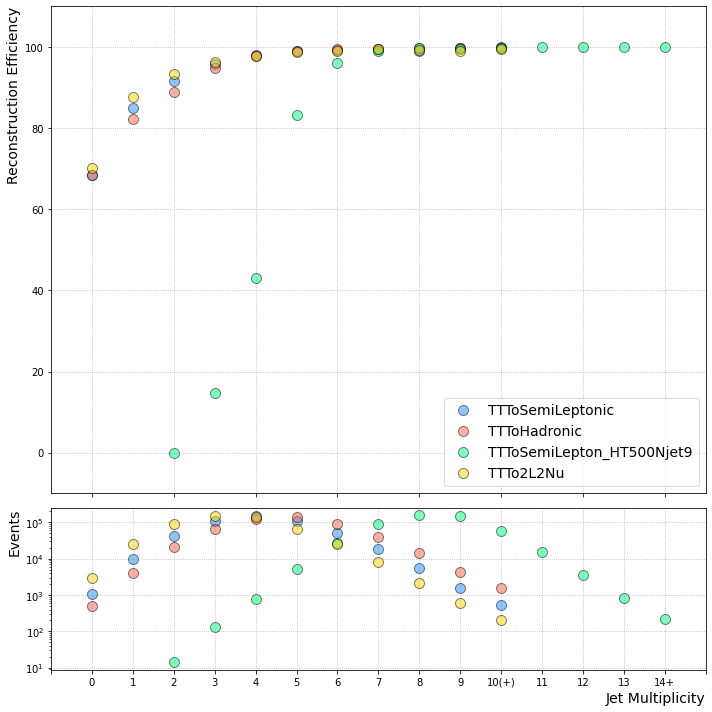

In [29]:
#@title Plot the reconstruction efficiency per jet multiplicity for each sample
figure, subplots = plt.subplots( 2, 1, gridspec_kw = { "height_ratios": [3, 1] }, figsize = (10,10) )

for i, sample in enumerate( samples_jet.value ):
  subplots[0].errorbar(
      data[ sample ][ "Jet" ][ "Multiplicity" ],
      100. * np.array( data[ sample ][ "Jet" ][ "Accurate"] ) / np.array( data[ sample ][ "Jet" ][ "Total" ] ),
      #yerr = [ PV_accuracy_err( data[ sample ][ "Jet" ][ "Total" ][i], data[ sample ][ "Jet" ][ "Accurate"][i] )  for i in range(len(data[ sample ][ "Jet" ][ "Multiplicity" ])) ],
      label = sample,
      ms = 10, alpha = 0.5, mfc = colors[i], mec = "k", marker = "o", ls = "",
      elinewidth = 2, ecolor = "k", capsize = 5
  )
  subplots[1].errorbar(
      data[ sample ][ "Jet" ][ "Multiplicity" ],
      data[ sample ][ "Jet" ][ "Total" ],
      #yerr = [ poisson_err(data[sample]["Jet"]["Total"][i]) for i in range(len(data[sample]["Jet"]["Total"])) ], 
      ms = 10, alpha = 0.5, mfc = colors[i], mec = "k", marker = "o", ls = "",
      elinewidth = 2, ecolor = "k", capsize = 5
  )
subplots[0].set_ylabel( "Reconstruction Efficiency", ha = "right", y = 1.0, fontsize = 14 )
subplots[1].set_ylabel( "Events", ha = "right", y = 1.0, fontsize = 14 )
subplots[1].set_yscale( "log" )
subplots[0].set_ylim( -10, 110 )
subplots[0].set_xlim( -1, 15 )
subplots[1].set_xlabel( "Jet Multiplicity", ha = "right", x = 1.0, fontsize = 14 )
subplots[1].set_xlim( -1, 15 )
subplots[0].axes.get_xaxis().set_ticklabels([])
subplots[1].axes.get_xaxis().set_ticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
subplots[1].axes.get_xaxis().set_ticklabels(["","0","1","2","3","4","5","6","7","8","9","10(+)","11","12","13","14+"])
subplots[0].grid( which = "major", linestyle = ":" )
subplots[1].grid( which = "major", linestyle = ":" )
subplots[0].legend( loc = 4, fontsize = 14 )
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
#@markdown Select the sample to plot for b-jet multiplicity
samples_bjet = widgets.Select( options = data.keys() )
samples_bjet

Select(options=('TTToSemiLeptonic', 'TTToHadronic', 'TTToSemiLepton_HT500Njet9', 'TTTo2L2Nu'), value='TTToSemi…

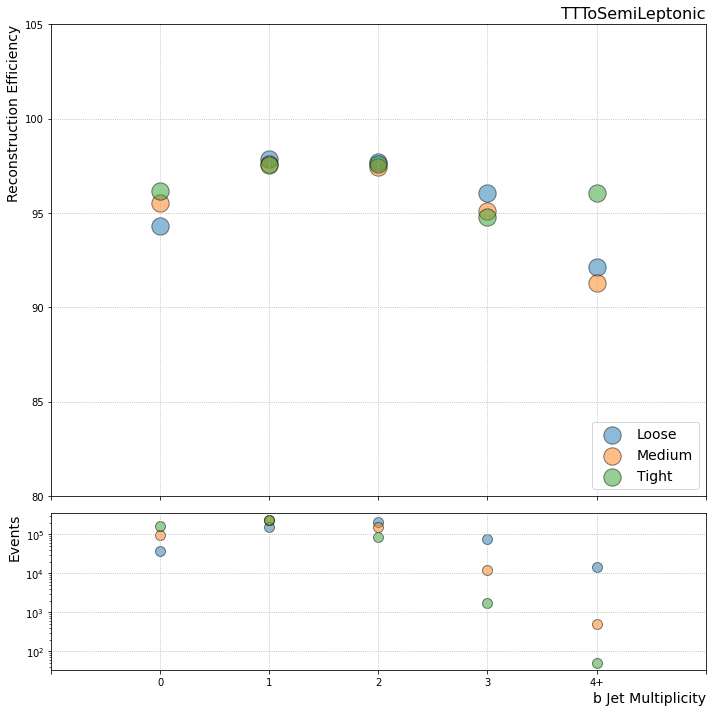

In [ ]:
#@title Plot the reconstruction efficiency per b-jet multiplicity for each sample
figure, subplots = plt.subplots( 2, 1, gridspec_kw = { "height_ratios": [3, 1] }, figsize = (10,10) )

for wp in [ "Loose", "Medium", "Tight" ]:
  subplots[0].scatter(
      data[ samples_bjet.value ][ f"b Jet ({wp})" ][ "Multiplicity" ],
      100. * np.array( data[ samples_bjet.value ][ f"b Jet ({wp})" ][ "Accurate"] ) / np.array( data[ samples_bjet.value ][ f"b Jet ({wp})" ][ "Total" ] ),
      label = wp,
      s = 300, alpha = 0.5, edgecolor = "k"
  )
  subplots[1].scatter(
      data[ samples_bjet.value ][ f"b Jet ({wp})" ][ "Multiplicity" ],
      data[ samples_bjet.value ][ f"b Jet ({wp})" ][ "Total" ],
      s = 100, alpha = 0.5, edgecolor = "k"
  )

subplots[0].set_title( samples_bjet.value, fontsize = 16, ha = "right", x = 1.0 )
subplots[0].set_ylabel( "Reconstruction Efficiency", ha = "right", y = 1.0, fontsize = 14 )
subplots[1].set_ylabel( "Events", ha = "right", y = 1.0, fontsize = 14 )
subplots[1].set_yscale( "log" )
subplots[0].set_ylim( 80, 105 )
subplots[1].set_xlabel( "b Jet Multiplicity", ha = "right", x = 1.0, fontsize = 14 )
subplots[0].axes.get_xaxis().set_ticklabels([])
if samples_bjet.value == "TTToSemiLepton_HT500Njet9":
  subplots[0].set_xlim( -1, 7 )
  subplots[1].set_xlim( -1, 7 )
  subplots[1].axes.get_xaxis().set_ticklabels(["","0","1","2","3","4","5","6+",""] )
else:
  subplots[0].set_xlim( -1, 5 )
  subplots[1].set_xlim( -1, 5 )
  subplots[1].axes.get_xaxis().set_ticklabels(["","0","1","2","3","4+",""])
subplots[0].grid( which = "major", linestyle = ":" )
subplots[1].grid( which = "major", linestyle = ":" )
subplots[0].legend( loc = 4, fontsize = 14 )
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
#@markdown Choose the working point for b-jets
wp_bjet = widgets.Select( options = [ "Loose", "Medium", "Tight" ] )
wp_bjet

Select(options=('Loose', 'Medium', 'Tight'), value='Loose')

In [ ]:
#@markdown Choose the samples to plot
samples_bjet = widgets.SelectMultiple( options = data.keys() )
samples_bjet

SelectMultiple(options=('TTToSemiLeptonic', 'TTToHadronic', 'TTToSemiLepton_HT500Njet9', 'TTTo2L2Nu'), value=(…

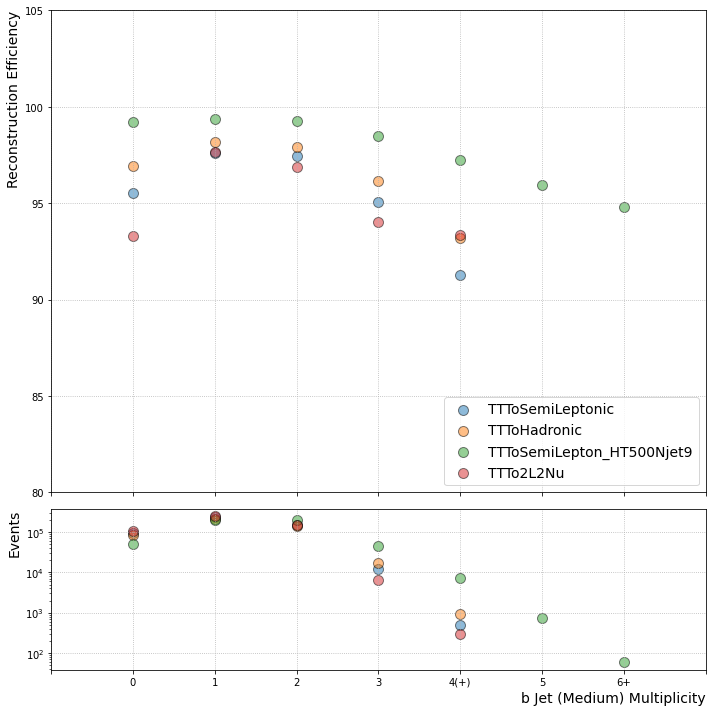

In [ ]:
#@title Plot the reconstruction efficiency per jet multiplicity for each sample
figure, subplots = plt.subplots( 2, 1, gridspec_kw = { "height_ratios": [3, 1] }, figsize = (10,10) )

for sample in samples_bjet.value:
  subplots[0].scatter(
      data[ sample ][ "b Jet ({})".format(wp_bjet.value) ][ "Multiplicity" ],
      100. * np.array( data[ sample ][ "b Jet ({})".format(wp_bjet.value) ][ "Accurate"] ) / np.array( data[ sample ][ "b Jet ({})".format(wp_bjet.value) ][ "Total" ] ),
      label = sample,
      s = 100, alpha = 0.5, edgecolor = "k"
  )
  subplots[1].scatter(
      data[ sample ][ "b Jet ({})".format(wp_bjet.value) ][ "Multiplicity" ],
      data[ sample ][ "b Jet ({})".format(wp_bjet.value) ][ "Total" ],
      s = 100, alpha = 0.5, edgecolor = "k"
  )
subplots[0].set_ylabel( "Reconstruction Efficiency", ha = "right", y = 1.0, fontsize = 14 )
subplots[1].set_ylabel( "Events", ha = "right", y = 1.0, fontsize = 14 )
subplots[1].set_yscale( "log" )
subplots[0].set_ylim( 80, 105 )
subplots[0].set_xlim( -1, 7 )
subplots[1].set_xlabel( "b Jet ({}) Multiplicity".format(wp_bjet.value), ha = "right", x = 1.0, fontsize = 14 )
subplots[1].set_xlim( -1, 7 )
subplots[0].axes.get_xaxis().set_ticklabels([])
subplots[1].axes.get_xaxis().set_ticks([-1,0,1,2,3,4,5,6,7])
subplots[1].axes.get_xaxis().set_ticklabels(["","0","1","2","3","4(+)","5","6+",""])
subplots[0].grid( which = "major", linestyle = ":" )
subplots[1].grid( which = "major", linestyle = ":" )
subplots[0].legend( loc = 4, fontsize = 14 )
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
#@markdown Select the sample to plot for lepton multiplicity
samples_lep = widgets.SelectMultiple( options = data.keys() )
samples_lep

SelectMultiple(options=('TTToSemiLeptonic', 'TTToHadronic', 'TTToSemiLepton_HT500Njet9', 'TTTo2L2Nu'), value=(…

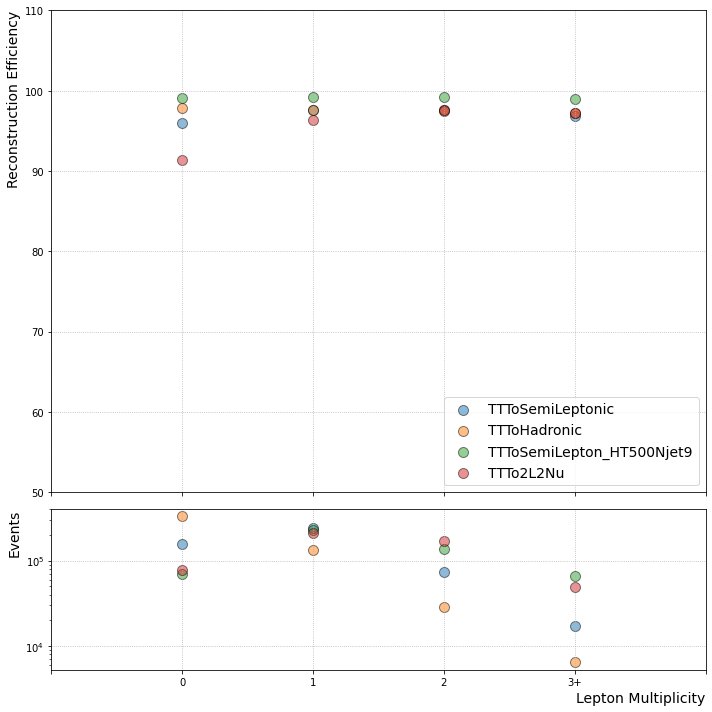

In [ ]:
#@title Plot the reconstruction efficiency per lepton multiplicity for each sample
figure, subplots = plt.subplots( 2, 1, gridspec_kw = { "height_ratios": [3, 1] }, figsize = (10,10) )

for sample in samples_lep.value:
  subplots[0].scatter(
      data[ sample ][ "Lepton" ][ "Multiplicity" ],
      100. * np.array( data[ sample ][ "Lepton" ][ "Accurate"] ) / np.array( data[ sample ][ "Lepton" ][ "Total" ] ),
      label = sample,
      s = 100, alpha = 0.5, edgecolor = "k"
  )
  subplots[1].scatter(
      data[ sample ][ "Lepton" ][ "Multiplicity" ],
      data[ sample ][ "Lepton" ][ "Total" ],
      s = 100, alpha = 0.5, edgecolor = "k"
  )
subplots[0].set_ylabel( "Reconstruction Efficiency", ha = "right", y = 1.0, fontsize = 14 )
subplots[1].set_ylabel( "Events", ha = "right", y = 1.0, fontsize = 14 )
subplots[1].set_yscale( "log" )
subplots[0].set_ylim( 50, 110 )
subplots[0].set_xlim( -1, 4 )
subplots[1].set_xlabel( "Lepton Multiplicity", ha = "right", x = 1.0, fontsize = 14 )
subplots[1].set_xlim( -1, 4 )
subplots[0].axes.get_xaxis().set_ticklabels([])
subplots[1].axes.get_xaxis().set_ticklabels(["","0","1","2","3+"])
subplots[0].grid( which = "major", linestyle = ":" )
subplots[1].grid( which = "major", linestyle = ":" )
subplots[0].legend( loc = 4, fontsize = 14 )
plt.tight_layout()
plt.show()
plt.close()

### Show efficiency tables for each of the samples

## # Jet vs # b-Jet Efficiency Plots
Using `matplotlib`'s `pcolormesh()` with [example here](https://www.python-graph-gallery.com/85-density-plot-with-matplotlib)

In [ ]:
#@markdown Data entry for jet vs b jet efficiency
data_2D = {
    "TTToSemiLeptonic":{
        "Jet": [0,1,2,3,4,5,6,7,8,9,10],
        "b Jet": [0,1,2,3,4],
        "Total (Loose)": np.array([ # ordered by (x,y) = (jet,bjet)
        np.array([1492,5855,10450,11218,7113,3003,966,275,60,17,3]),
        np.array([-1,5592,25612,48998,45585,23534,8540,2503,617,139,38]),
        np.array([-1,-1,9978,42326,68247,49715,21318,6896,1870,417,146]),
        np.array([-1,-1,-1,7559,21747,23009,12599,5118,617,460,151]),
        np.array([-1,-1,-1,-1,2185,4278,3760,2133,928,296,148])
        ]),
        "Accurate (Loose)": np.array([
        np.array([1070,5236,9935,10894,6898,2897,918,259,56,16,3]),
        np.array([0,4566,24277,48290,45337,23435,8502,2492,610,138,38]),
        np.array([0,0,8169,40455,67563,49559,21276,6886,1868,417,146]),
        np.array([0,0,0,6122,20707,22725,12547,5113,610,460,151]),
        np.array([0,0,0,0,1640,3886,3646,2098,920,296,148])                   
        ]),
        "Total (Medium)": np.array([ # ordered by (x,y) = (jet,bjet)
        np.array([1492,7630,18316,27128,23289,12586,5007,1697,469,133,33]),
        np.array([-1,3817,23704,58523,70464,45360,19737,6667,1899,485,179]),
        np.array([-1,-1,4020,23552,48028,41708,19889,7341,2245,559,212]),
        np.array([-1,-1,-1,898,3043,3772,2401,1123,418,130,52]),
        np.array([-1,-1,-1,-1,53,113,149,97,38,22,10])
        ]),
        "Accurate (Medium)": np.array([
        np.array([1070,6687,17196,26219,22760,12338,4902,1666,458,132,33]),
        np.array([0,3115,21923,56744,69563,45071,19667,6651,1893,484,179]),
        np.array([0,0,3262,22080,46989,41341,19804,7323,2241,559,212]),
        np.array([0,0,0,718,2797,3655,2373,1115,418,130,52]),
        np.array([0,0,0,0,36,97,143,93,37,22,10])                   
        ]),
        "Total (Tight)": np.array([ # ordered by (x,y) = (jet,bjet)
        np.array([1492,8753,25213,44236,44890,27243,11595,4003,1181,323,102]),
        np.array([-1,2694,18929,53286,72682,51515,23391,8300,2424,617,223]),
        np.array([-1,-1,1898,12486,26971,24263,11777,4377,1373,353,146]),
        np.array([-1,-1,-1,93,332,510,406,234,85,30,13]),
        np.array([-1,-1,-1,-1,2,8,14,11,6,6,2])
        ]),
        "Accurate (Tight)": np.array([
        np.array([1070,7624,23491,42640,43918,26846,11455,3955,1166,321,102]),
        np.array([0,2178,17338,51320,71548,51149,23289,8284,2417,617,223]),
        np.array([0,0,1562,11729,26382,24017,11729,4365,1373,353,146]),
        np.array([0,0,0,72,296,482,403,233,85,30,13]),
        np.array([0,0,0,0,1,8,13,11,6,6,2])                   
        ]),
    },
    "TTToSemiLepton_HT500Njet9":{
        "Jet": [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
        "b Jet": [0,1,2,3,4,5,6],
        "Total (Loose)": np.array([ # ordered by (x,y) = (jet,bjet)
        np.array([-1,-1,-1,13,69,415,1228,2192,2222,1272,364,79,22,2,-1]),
        np.array([-1,-1,10,40,262,1905,7502,17071,21298,13596,4129,992,186,31,12]),
        np.array([-1,-1,9,72,335,2534,12887,37707,57787,44104,14287,3296,707,126,32]),
        np.array([-1,-1,-1,48,294,1369,7930,27441,50154,43607,16240,4073,958,193,61]),
        np.array([-1,-1,-1,-1,126,525,2559,10387,22670,23505,10020,2906,689,177,36]),
        np.array([-1,-1,-1,-1,-1,148,601,2397,6312,7855,3941,1349,372,101,22]),
        np.array([-1,-1,-1,-1,-1,-1,127,481,1330,2182,1415,552,176,57,20])
        ]),
        "Accurate (Loose)": np.array([
        np.array([0,0,0,9,57,406,1215,2185,2220,1272,364,79,22,2,0]),
        np.array([0,0,0,17,231,1873,7485,17059,21291,13595,4126,991,186,31,12]),
        np.array([0,0,0,10,199,2416,12811,37673,57777,44099,14284,3296,707,126,32]),
        np.array([0,0,0,1,62,1085,7715,27326,50122,43596,16239,4073,957,193,61]),
        np.array([0,0,0,0,8,209,2235,10175,22603,23479,10016,2905,689,177,36]),
        np.array([0,0,0,0,0,11,294,2173,6211,7821,3936,1348,372,101,22]),
        np.array([0,0,0,0,0,0,29,263,1158,2072,1397,546,175,57,20])
        ]),
        "Total (Medium)": np.array([ # ordered by (x,y) = (jet,bjet)
        np.array([-1,-1,3,47,240,1502,5375,12388,16161,11543,3823,1053,243,46,10]),
        np.array([-1,-1,14,75,504,3254,15020,41548,63481,49432,17583,4453,1015,226,62]),
        np.array([-1,-1,2,42,282,1814,10524,36448,66387,58724,21925,5696,1285,281,73]),
        np.array([-1,-1,-1,9,58,299,1709,6458,13629,13806,5784,1658,454,107,25]),
        np.array([-1,-1,-1,-1,2,27,190,771,1954,2338,1132,334,97,21,13]),
        np.array([-1,-1,-1,-1,-1,-1,16,60,155,256,137,44,16,5,-1]),
        np.array([-1,-1,-1,-1,-1,-1,-1,3,6,22,12,9,-1,1,-1])
        ]),
        "Accurate (Medium)": np.array([
        np.array([0,0,0,21,166,1410,5273,12324,16124,11529,3813,1051,243,46,10]),
        np.array([0,0,0,15,274,2948,14716,41317,63393,49393,17574,4451,1015,226,62]),
        np.array([0,0,0,1,105,1481,10123,36144,66246,58662,21915,5693,1283,281,73]),
        np.array([0,0,0,0,12,153,1528,6294,13549,13762,5778,1658,454,107,25]),
        np.array([0,0,0,0,0,8,137,719,1912,2318,1130,334,97,21,13]),
        np.array([0,0,0,0,0,0,7,54,152,249,135,43,16,5,0]),
        np.array([0,0,0,0,0,0,0,2,6,21,12,8,0,1,0])                   
        ]),
        "Total (Tight)": np.array([ # ordered by (x,y) = (jet,bjet)
        np.array([-1,-1,11,77,459,2712,10722,27489,39885,30660,10947,2963,730,150,42]),
        np.array([-1,-1,8,79,478,3225,16002,47349,77538,64588,23660,6081,1414,307,86]),
        np.array([-1,-1,-1,17,143,908,5745,21295,40799,36955,14041,3683,814,194,45]),
        np.array([-1,-1,-1,-1,6,48,341,1397,3230,3490,1522,459,126,28,9]),
        np.array([-1,-1,-1,-1,-1,3,24,144,315,410,218,59,25,8,1]),
        np.array([-1,-1,-1,-1,-1,-1,-1,2,6,18,8,2,1,-1,-1]),
        np.array([-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
        ]),
        "Accurate (Tight)": np.array([
        np.array([0,0,0,26,275,2442,10419,27267,39771,30613,10934,2958,729,150,42]),
        np.array([0,0,0,10,230,2813,15557,47003,77396,64522,23647,6078,1413,307,86]),
        np.array([0,0,0,1,51,716,5487,21091,40684,36899,14035,3683,814,194,45]),
        np.array([0,0,0,0,1,29,306,1355,3210,3475,1521,458,126,28,9]),
        np.array([0,0,0,0,0,0,15,136,315,408,217,59,25,8,1]),
        np.array([0,0,0,0,0,0,0,2,6,17,8,2,1,0,0]),
        np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])                   
        ]),
    },
    "TTTo2L2Nu":{
        "Jet": [0,1,2,3,4,5,6,7,8,9,10],
        "b Jet": [0,1,2,3,4],
        "Total (Loose)": np.array([ # ordered by (x,y) = (jet,bjet)
        np.array([3623,12559,16344,11601,5104,1761,460,116,22,6,1]),
        np.array([-1,15492,52966,64748,38146,14392,4254,1138,240,50,9]),
        np.array([-1,-1,22977,69102,71278,32510,10999,3082,739,163,47]),
        np.array([-1,-1,-1,8963,17554,12389,5836,2096,603,182,61]),
        np.array([-1,-1,-1,-1,1490,2162,1599,781,364,108,57])
        ]),
        "Accurate (Loose)": np.array([
        np.array([2593,11207,15339,11105,4822,1629,415,107,21,5,1]),
        np.array([0,13497,50613,63637,37841,14306,4218,1131,234,48,8]),
        np.array([0,0,20347,66483,70375,32366,10974,3077,738,163,47]),
        np.array([0,0,0,8963,17554,12389,5836,2096,603,182,61]),
        np.array([0,0,0,0,1490,2162,1599,781,364,108,57])                   
        ]),
        "Total (Medium)": np.array([ # ordered by (x,y) = (jet,bjet)
        np.array([3623,16304,29803,29598,17570,7375,2282,688,186,51,15]),
        np.array([-1,11747,50694,80424,61193,27228,9533,2845,721,190,59]),
        np.array([-1,-1,11790,43642,52765,26676,10214,3236,877,212,75]),
        np.array([-1,-1,-1,750,2008,1834,1062,416,160,44,19]),
        np.array([-1,-1,-1,-1,36,101,57,48,24,12,7])
        ]),
        "Accurate (Medium)": np.array([
        np.array([2593,14420,27805,28368,16958,7123,2187,651,178,48,14]),
        np.array([0,10284,47893,78058,60300,27013,9491,2840,716,189,59]),
        np.array([0,0,10601,41683,51594,26425,10163,3232,875,212,75]),
        np.array([0,0,0,608,1839,1781,1045,414,160,44,19]),
        np.array([0,0,0,0,27,94,55,47,24,12,7])                   
        ]),
        "Total (Tight)": np.array([ # ordered by (x,y) = (jet,bjet)
        np.array([3623,19368,43537,52410,36050,15905,5427,1655,464,134,42]),
        np.array([-1,8683,42419,77367,66565,31236,11389,3489,909,229,83]),
        np.array([-1,-1,6331,24540,30657,15690,6089,1945,536,129,44]),
        np.array([-1,-1,-1,97,295,376,228,113,53,15,6]),
        np.array([-1,-1,-1,-1,5,7,15,11,6,2,-1])
        ]),
        "Accurate (Tight)": np.array([
        np.array([2593,17073,40652,50279,35043,15538,5309,1635,455,130,41]),
        np.array([0,7631,39894,74838,65378,30956,11336,3482,904,229,83]),
        np.array([0,0,5753,23524,30019,15570,6057,1944,535,129,44]),
        np.array([0,0,0,76,273,365,224,113,53,15,6]),
        np.array([0,0,0,0,5,7,15,10,6,2,0])                   
        ]),
    },
    "TTToHadronic":{
        "Jet": [0,1,2,3,4,5,6,7,8,9,10],
        "b Jet": [0,1,2,3,4],
        "Total (Loose)": np.array([ # ordered by (x,y) = (jet,bjet)
        np.array([600,2643,5573,7779,7161,4244,1735,522,127,40,8]),
        np.array([-1,2195,11335,27848,38330,29286,13917,4853,1320,327,104]),
        np.array([-1,-1,4262,21412,49609,54946,33013,13178,4258,1007,315]),
        np.array([-1,-1,-1,4388,17335,27901,21973,10641,3837,1184,416]),
        np.array([-1,-1,-1,-1,2132,5849,7029,4576,2401,903,430])
        ]),
        "Accurate (Loose)": np.array([
        np.array([486,2360,5314,7596,6988,4139,1701,501,120,38,6]),
        np.array([0,1689,10629,27422,38128,29196,13886,4838,1318,326,104]),
        np.array([0,0,3070,20191,49130,54798,32991,13158,4257,1007,313]),
        np.array([0,0,0,3175,16427,27617,21912,10629,3835,1182,416]),
        np.array([0,0,0,0,1550,5384,6834,4517,2387,903,430])                   
        ]),
        "Total (Medium)": np.array([ # ordered by (x,y) = (jet,bjet)
        np.array([660,3428,9772,18221,22678,17313,8834,3400,1067,309,102]),
        np.array([-1,1410,9910,32281,57130,55773,32555,13502,4442,1202,450]),
        np.array([-1,-1,1488,10459,32154,44131,31651,14168,5267,1496,545]),
        np.array([-1,-1,-1,466,2552,4825,4408,2483,1042,396,148]),
        np.array([-1,-1,-1,-1,53,184,219,217,125,58,28])
        ]),
        "Accurate (Medium)": np.array([
        np.array([486,2988,9170,17654,22243,17072,8752,3353,1058,307,99]),
        np.array([0,1061,8829,31028,56377,55473,32476,13472,4437,1199,450]),
        np.array([0,0,1014,9398,31283,43728,31534,14140,5261,1496,543]),
        np.array([0,0,0,304,2287,4698,4355,2468,1038,396,148]),
        np.array([0,0,0,0,33,163,207,210,123,58,28])                   
        ]),
        "Total (Tight)": np.array([ # ordered by (x,y) = (jet,bjet)
        np.array([660,3894,12844,28279,41048,35825,20254,8185,2797,784,273]),
        np.array([-1,944,7727,28191,56191,60641,38134,16502,5711,1605,623]),
        np.array([-1,-1,599,4911,17012,25143,18668,8661,3244,980,339]),
        np.array([-1,-1,-1,46,314,604,601,400,174,84,35]),
        np.array([-1,-1,-1,-1,2,13,10,22,17,8,3])
        ]),
        "Accurate (Tight)": np.array([
        np.array([486,3341,11853,27190,40259,35412,20113,8121,2785,780,269]),
        np.array([0,708,6757,26801,55167,60221,38027,16458,5706,1604,622]),
        np.array([0,0,403,4369,16520,24915,18582,8645,3236,980,339]),
        np.array([0,0,0,24,275,575,593,397,173,84,35]),
        np.array([0,0,0,0,2,11,9,22,17,8,3])                   
        ]),
    },
}

In [30]:
#@markdown Choose a sample
samples_2D = widgets.Select( options = data_2D.keys() )
samples_2D

Select(options=('TTToSemiLeptonic', 'TTToSemiLepton_HT500Njet9', 'TTTo2L2Nu', 'TTToHadronic'), value='TTToSemi…

In [31]:
#@markdown Choose a b jet working point
wp_2D = widgets.Select( options = ["Loose", "Medium", "Tight"] )
wp_2D

Select(options=('Loose', 'Medium', 'Tight'), value='Loose')

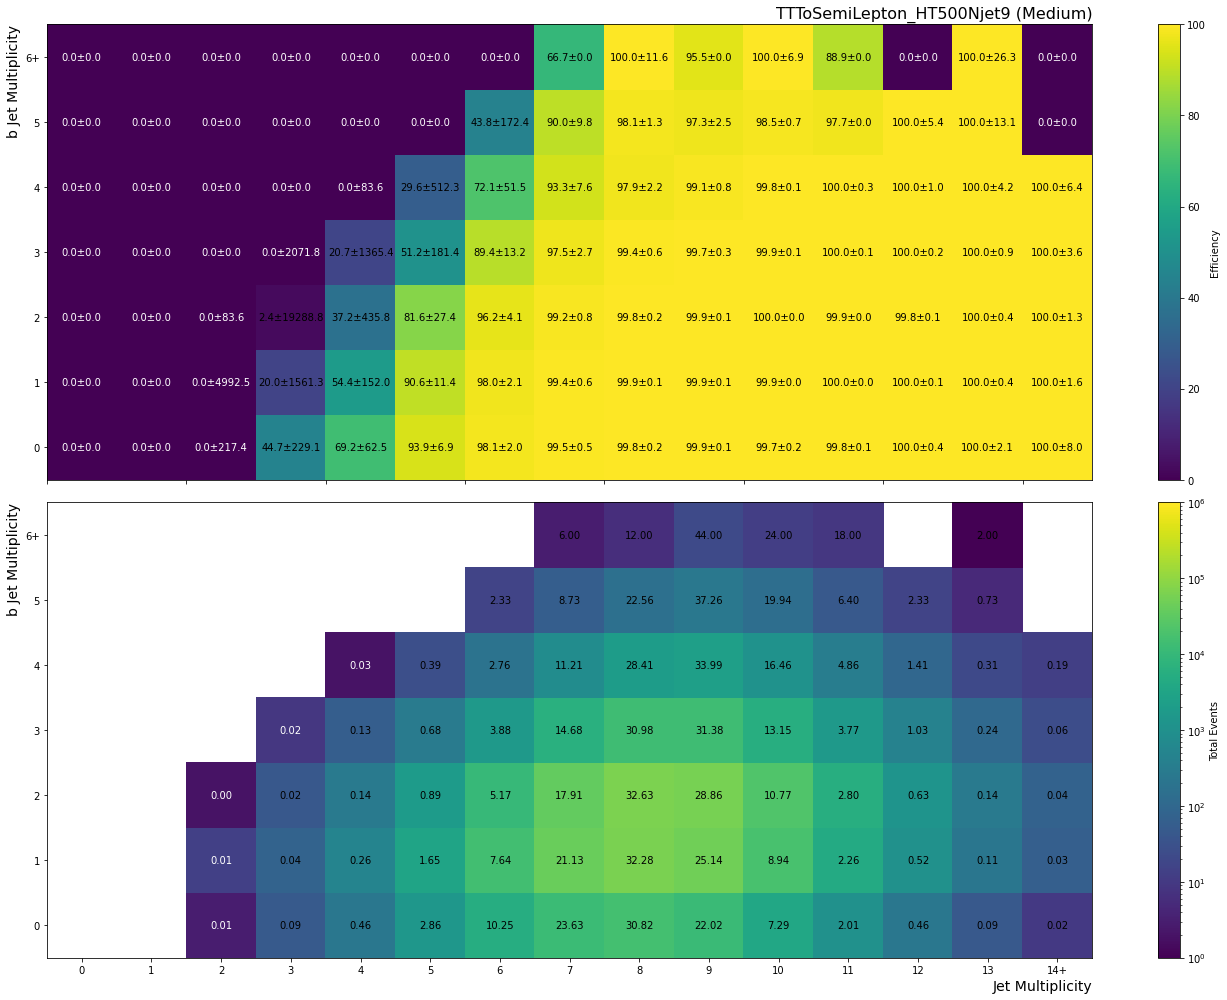

In [32]:
#@markdown Plot the jet vs b jet efficiency
figure, subplots = plt.subplots( 
    2, 1, gridspec_kw = { "height_ratios": [1, 1] }, 
    figsize = ( len(data_2D[samples_2D.value]["Jet"]) + 4, 2*len(data_2D[samples_2D.value]["b Jet"]) )
    )

efficiency = 100*data_2D[samples_2D.value][f"Accurate ({wp_2D.value})"] / data_2D[samples_2D.value][f"Total ({wp_2D.value})"]
pcm_0 = subplots[0].pcolormesh( 
    np.arange(max(data_2D[samples_2D.value]["Jet"])+2),
    np.arange(max(data_2D[samples_2D.value]["b Jet"])+2),
    efficiency
 )
figure.colorbar( pcm_0, ax = subplots[0], label = "Efficiency" )
pcm_1 = subplots[1].pcolormesh(
    np.arange(max(data_2D[samples_2D.value]["Jet"])+2),
    np.arange(max(data_2D[samples_2D.value]["b Jet"])+2),
    data_2D[samples_2D.value][f"Total ({wp_2D.value})"],
    norm = LogNorm(),
    vmin = 1, vmax = 10e5
)

figure.colorbar( pcm_1, ax = subplots[1], label = "Total Events" )
for i in range(len(data_2D[samples_2D.value]["Jet"])):
  for j in range(len(data_2D[samples_2D.value]["b Jet"])):
    nB_events = sum( data_2D[samples_2D.value][f"Total ({wp_2D.value})"][j] ) + j
    if efficiency[j,i] == 0: color = "w" 
    else: color = "k"
    n_ = data_2D[samples_2D.value][f"Accurate ({wp_2D.value})"][j,i]
    k_ = data_2D[samples_2D.value][f"Total ({wp_2D.value})"][j,i]
    text = subplots[0].text(
        i+0.5, j+0.5,
        u"{:.1f}\u00B1{:.1f}".format( abs(np.around(efficiency[j,i],1)), abs( np.around(100*PV_accuracy_err(n_, k_),1) ) ),
        ha = "center", va = "center", color = color
    )
    text = subplots[1].text(
        i+0.5, j+0.5,
        "{:.2f}".format( 100 * float( k_ ) / float( nB_events ), 2),
        #k_,
        ha = "center", va = "center", color = color 
    )

subplots[0].set_title( samples_2D.value + f" ({wp_2D.value})", ha = "right", x = 1.0, fontsize = 16 )

subplots[1].set_xlabel("Jet Multiplicity", ha = "right", x = 1.0, fontsize = 14)
subplots[0].axes.get_xaxis().set_ticklabels([])
subplots[1].axes.get_xaxis().set_ticks(
    np.array(data_2D[samples_2D.value]["Jet"])+0.5,
    )
subplots[0].set_ylabel("b Jet Multiplicity", ha = "right", y = 1.0, fontsize = 14)
subplots[1].set_ylabel("b Jet Multiplicity", ha = "right", y = 1.0, fontsize = 14)
subplots[0].axes.get_yaxis().set_ticks(
    np.array(data_2D[samples_2D.value]["b Jet"])+0.5,
    )
subplots[1].axes.get_yaxis().set_ticks(
    np.array(data_2D[samples_2D.value]["b Jet"])+0.5,
    )

y_ticklabels = []
for val in data_2D[samples_2D.value]["b Jet"]:
  if val != data_2D[samples_2D.value]["b Jet"][-1]:
    y_ticklabels.append(str(val))
  else:
    y_ticklabels.append(str(val)+"+")

x_ticklabels = []
for val in data_2D[samples_2D.value]["Jet"]:
  if val != data_2D[samples_2D.value]["Jet"][-1]:
    x_ticklabels.append(str(val))
  else:
    x_ticklabels.append(str(val)+"+")

subplots[1].axes.get_xaxis().set_ticklabels(
    x_ticklabels
)
subplots[0].axes.get_yaxis().set_ticklabels(
    y_ticklabels
)
subplots[1].axes.get_yaxis().set_ticklabels(
    y_ticklabels
)
    
figure.tight_layout()
plt.show()
plt.close()